       Admit  Gender Dept  Freq
0   Admitted    Male    A   512
1   Rejected    Male    A   313
2   Admitted  Female    A    89
3   Rejected  Female    A    19
4   Admitted    Male    B   353
5   Rejected    Male    B   207
6   Admitted  Female    B    17
7   Rejected  Female    B     8
8   Admitted    Male    C   120
9   Rejected    Male    C   205
10  Admitted  Female    C   202
11  Rejected  Female    C   391
12  Admitted    Male    D   138
13  Rejected    Male    D   279
14  Admitted  Female    D   131
15  Rejected  Female    D   244
16  Admitted    Male    E    53
17  Rejected    Male    E   138
18  Admitted  Female    E    94
19  Rejected  Female    E   299
20  Admitted    Male    F    22
21  Rejected    Male    F   351
22  Admitted  Female    F    24
23  Rejected  Female    F   317
The total applicant numbers for each gender are {'Males': 2691, 'Females': 1835}.
The total admits for each gender are {'Males': 1198, 'Females': 557}.
  Dept  Total Males  Admitted Males  % Males Adm

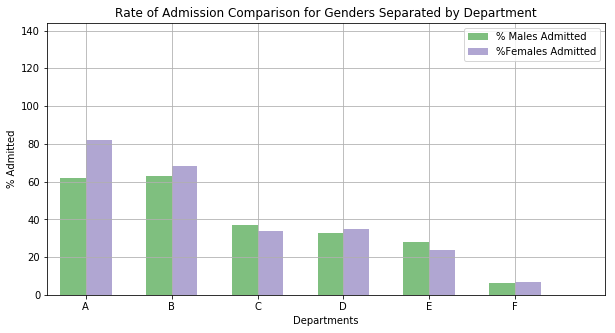

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = './Desktop/1973UCBGradAdmData.csv'
df = pd.read_csv(file)
print(df)

totals_dict = {}
totals_dict['Males'] = 0
totals_dict['Females'] = 0
for Gender, Freq in zip(df['Gender'], df['Freq']):
    if Gender =='Male':
        totals_dict['Males'] += Freq
    elif Gender == 'Female':
        totals_dict['Females'] += Freq

print("The total applicant numbers for each gender are {}.".format(totals_dict))

total_admit_dict = {}
total_admit_dict['Males'] = 0
total_admit_dict['Females'] = 0
for Admit, Gender, Freq in zip(df['Admit'], df['Gender'], df['Freq']):
    if Admit == 'Admitted' and Gender =='Male':
        total_admit_dict['Males'] += Freq
    elif Admit == 'Admitted' and Gender == 'Female':
        total_admit_dict['Females'] += Freq

print("The total admits for each gender are {}.".format(total_admit_dict))

#Build dataframe for Depts

df_dept = pd.DataFrame(columns = ['Dept', 'Total Males', 'Admitted Males', '% Males Admitted', 'Total Females', 'Admitted Females', '% Females Admitted'])
for Admit, Gender, Dept, Freq in zip(df['Admit'], df['Gender'], df['Dept'], df['Freq']):
        if Dept == 'A':
            df_dept.loc[0] = pd.Series({'Dept':Dept, 'Total Males':825, 'Admitted Males':512, '% Males Admitted':62, 'Total Females': 108, 'Admitted Females':89, '% Females Admitted': 82 })
        elif Dept == 'B':
            df_dept.loc[1] = pd.Series({'Dept':Dept, 'Total Males':560, 'Admitted Males':353, '% Males Admitted':63, 'Total Females': 25, 'Admitted Females':17, '% Females Admitted': 68 })
        elif Dept == 'C':
            df_dept.loc[2] = pd.Series({'Dept':Dept, 'Total Males':325, 'Admitted Males':120, '% Males Admitted':37, 'Total Females': 593, 'Admitted Females':202, '% Females Admitted': 34 })
        elif Dept == 'D':
            df_dept.loc[3] = pd.Series({'Dept':Dept, 'Total Males':417, 'Admitted Males':138, '% Males Admitted':33, 'Total Females': 375, 'Admitted Females':131, '% Females Admitted': 35 })
        elif Dept == 'E':
            df_dept.loc[4] = pd.Series({'Dept':Dept, 'Total Males':191, 'Admitted Males':53, '% Males Admitted':28, 'Total Females': 393, 'Admitted Females':94, '% Females Admitted': 24 })
        elif Dept == 'F':
            df_dept.loc[5] = pd.Series({'Dept':Dept, 'Total Males':373, 'Admitted Males':22, '% Males Admitted':6, 'Total Females': 24, 'Admitted Females':341, '% Females Admitted': 7 })
        
    
print(df_dept)


#Visualize rate of admission by department

#Setting the positions and width for the bars 
pos = list(range(len(df_dept['% Males Admitted'])))
width = 0.3

#Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

#Create a bar with % Male Admit data,
#in position pos,
plt.bar(pos, df_dept['% Males Admitted'], width, alpha = 0.5, color='g', label=df_dept['Dept'][0])

#Create a bar with % Female Admit data,
#in position pos + some width buffer
plt.bar([p + width for p in pos], df_dept['% Females Admitted'], width, alpha=0.5, color = '#624ea7', label=df_dept['Dept'][1])

#Set the y axis label
ax.set_ylabel('% Admitted')

#Set the x-axmis label
ax.set_xlabel('Departments')

#Set chart title
ax.set_title('Rate of Admission Comparison for Genders Separated by Department')

#Set x-tick position
ax.set_xticks([p + .5*width for p in pos])

#Set the x-tick labels
ax.set_xticklabels(df_dept['Dept'])

#Setting x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, 100)])

#Adding legend and showing plot
plt.legend(['% Males Admitted', '%Females Admitted'], loc='upper right')
plt.grid()
plt.show()


